In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from Functions import *
from Hill_climbing import *
from Simulated_annealing import *
from Genetic_algorithm import *
from Multi_Genetic_algorithm import *
from Particle_group_algorithm import *
from Ant_colony_algorithm import *
from Greedy import Greedy
from inf_team import Solver

In [ ]:
# 处理原始数据
nodes, node_index_map, adj_matrix = Read_file("map1.txt")
dist, Path = floyd(adj_matrix)
stay_time = init_time_stay(nodes, node_index_map)

节点列表： ['O', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', '1', 'P', 'Q', 'R']


最短路径0: ['O', 'C', '3', '2', '3', 'D', '4', '8', 'E', '9', 'F', '10', 'F', '12', 'G', '13', 'J', '18', 'K', '21', '25', '21', '23', '24', '27', '28', 'Q', '29', 'P', 'O'] 
经过节点个数: 30 路径长度 273.9
最短路径1: ['O', '1', 'O', '2', '5', 'M', '25', '21', 'K', '17', '16', '17', '22', '23', 'N', '26', '27', '28', 'Q', '30', '32', '31', '33', 'A', 'B', '34', '35', '32', '31', 'R', 'O'] 
经过节点个数: 31 路径长度 271.0
最短路径2: ['O', 'M', '25', '21', 'K', '18', 'I', '15', '14', 'H', '12', 'G', '11', 'J', '19', '20', 'L', '6', '7', 'E', '9', 'E', '7', '6', '5', '2', 'O'] 
经过节点个数: 27 路径长度 238.9
路径长度: 783.8
迭代次数: 200000


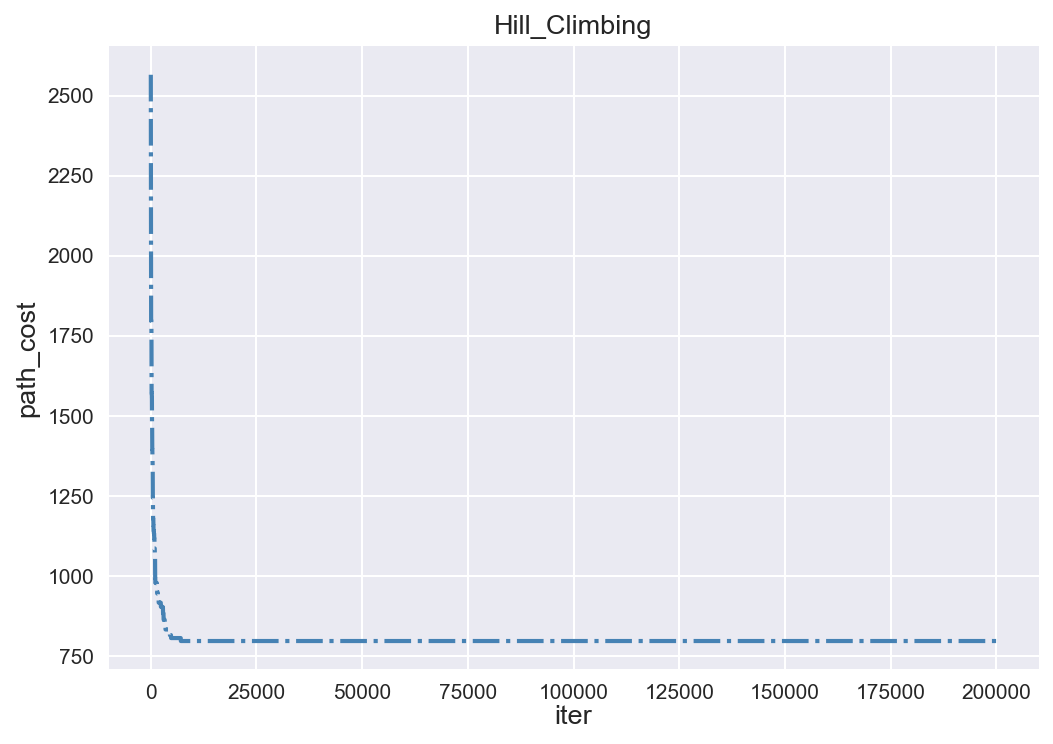

In [8]:
# 爬山路径长度测试
best_path, best_cost, iterations, best_cost_list = hill_climbing(dist, stay_time, method=1, team_num = 3)
paths = split_path(best_path, Path, team_num = 3, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Hill_Climbing', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

访问节点列表0: ['O', '3', '4', '10', 'F', 'E', 'Q', '31', '32', '34', '35', '33', 'B', '2', 'O'] 
访问节点个数: 15 总时间 26.0
最短路径0: ['O', '2', '3', 'D', '4', '8', 'E', '9', 'F', '10', 'F', '9', 'E', '7', '6', '5', '2', 'O', 'R', '29', 'Q', '29', 'R', '31', '32', '35', '34', '35', '33', 'A', 'B', '1', 'O', '2', 'O'] 
经过节点个数: 35 总路程长度 315.3
-------------------------------------------------
访问节点列表1: ['O', '1', 'P', 'D', '11', 'K', 'L', 'R', 'M', '8', 'C', 'O'] 
访问节点个数: 12 总时间 26.0
最短路径1: ['O', '1', 'O', 'P', 'O', '2', '3', 'D', '7', 'E', '11', 'J', '18', 'K', '21', '20', 'L', '6', '5', '2', 'O', 'R', 'O', 'M', '6', '7', 'E', '8', 'E', '7', 'D', '3', 'C', 'O'] 
经过节点个数: 34 总路程长度 313.5
-------------------------------------------------
访问节点列表2: ['O', '19', 'I', 'G', 'J', '15', '16', '18', '25', '24', 'N', '26', 'A', 'O'] 
访问节点个数: 14 总时间 25.5
最短路径2: ['O', '2', '5', '6', 'L', '19', 'J', 'I', '13', 'G', '13', 'J', 'I', '15', 'I', '16', 'I', '18', 'K', '21', '25', 'N', '24', 'N', '26', 'P', 'O', '1', 'A', '1'

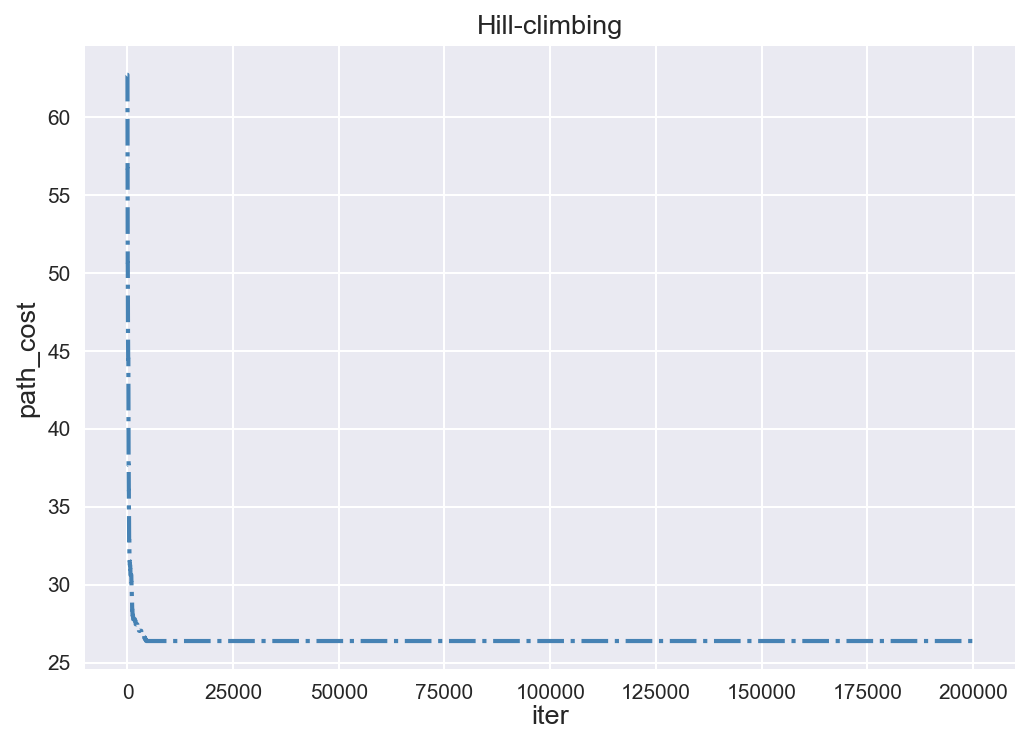

In [4]:
# 爬山耗时测试
best_path, best_cost, iterations, best_cost_list = hill_climbing(dist, stay_time, method=2, team_num = 4)
paths = split_path(best_path, Path, team_num = 4, expand = False)
true_paths = split_path(best_path, Path, team_num = 4, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_one_team_time_cost(paths[j], dist, stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n访问节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in path_expansion(true_paths[j], Path)]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Hill-climbing', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

最短路径0: ['O', 'C', 'B', '34', '35', '33', '31', '32', '30', 'Q', '28', '27', '28', 'Q', '29', 'R', 'A', '1', 'O'] 
经过节点个数: 19 路径长度 174.6
最短路径1: ['O', '2', '3', 'D', '4', '8', 'E', '11', 'G', '13', 'J', '19', 'L', '20', '25', '21', 'K', '21', '23', '24', 'N', 'M', 'O'] 
经过节点个数: 23 路径长度 211.0
最短路径2: ['O', '2', '5', '6', '7', 'E', '9', 'F', '10', 'F', '12', 'H', '14', '15', 'I', '18', 'I', '16', '17', '22', '23', 'N', '26', 'P', 'O'] 
经过节点个数: 25 路径长度 223.3
路径长度: 608.9
迭代次数: 184198


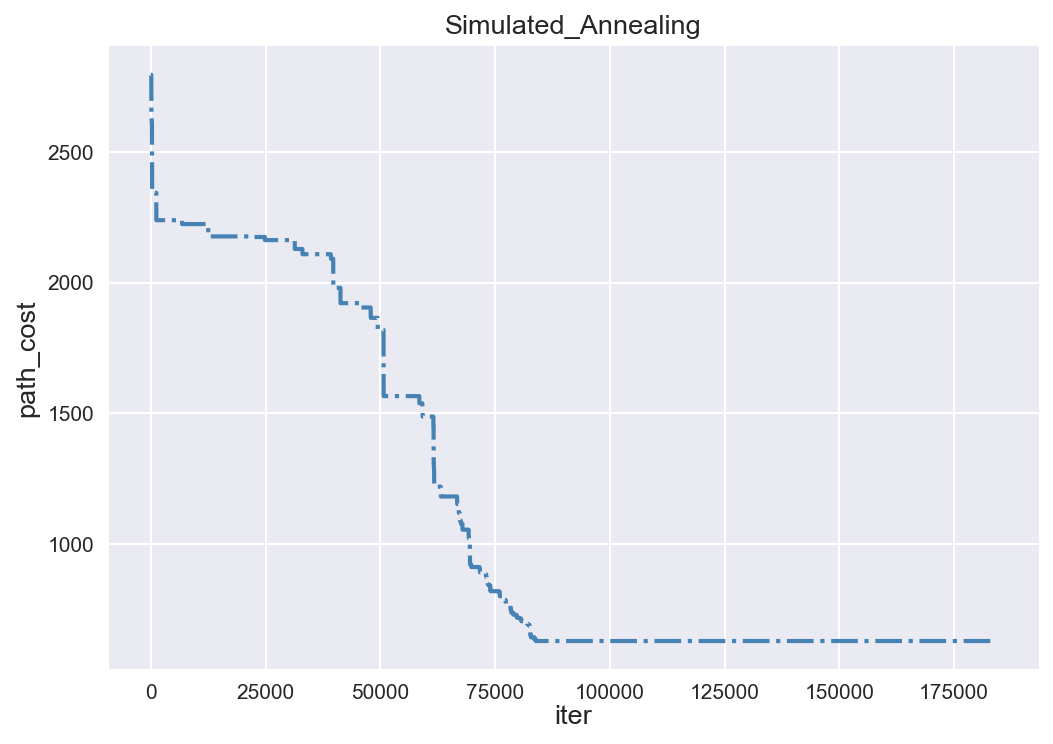

In [3]:
# 模拟退火路径长度测试
total_best_cost = float("inf")
for i in range(100):
    best_path, best_cost, iterations, best_cost_list = simulated_annealing(dist, stay_time, method=1, team_num = 3)
    if best_cost  < total_best_cost:
        total_best_cost = best_cost
        total_best_path = best_path
        total_best_iterations = iterations
        total_best_list = best_cost_list

paths = split_path(total_best_path, Path, team_num = 3, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", total_best_cost)
print("迭代次数:", total_best_iterations)

plt.style.use('seaborn')
plt.figure(dpi=150)
plt.plot(list(range(len(total_best_list))), total_best_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Simulated_Annealing', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

访问节点列表0: ['O', 'M', '25', '17', '22', '16', 'I', '15', '14', '13', '20', 'L', '7', '6', '2', 'O'] 
访问节点个数: 16 总时间 22.7
最短路径0: ['O', 'M', '25', '21', 'K', '17', '22', '17', '16', 'I', '15', '14', '13', 'J', '19', '20', 'L', '7', '6', '5', '2', 'O'] 
经过节点个数: 22 总路程长度 199.2
-------------------------------------------------
访问节点列表1: ['O', '5', '9', '10', 'F', 'H', '12', 'G', '11', '19', '23', '24', '27', '28', 'O'] 
访问节点个数: 15 总时间 22.6
最短路径1: ['O', '2', '5', '6', '7', 'E', '9', 'F', '10', 'F', '12', 'H', '12', 'G', '11', 'J', '19', '20', '21', '23', '24', '27', '28', 'P', 'O'] 
经过节点个数: 25 总路程长度 229.3
-------------------------------------------------
访问节点列表2: ['O', 'C', '3', 'D', '4', '8', 'E', 'J', '18', 'K', '21', 'N', '26', 'O'] 
访问节点个数: 14 总时间 22.7
最短路径2: ['O', 'C', '3', 'D', '4', '8', 'E', '11', 'J', '18', 'K', '21', '25', 'N', '26', 'P', 'O'] 
经过节点个数: 17 总路程长度 165.1
-------------------------------------------------
访问节点列表3: ['O', 'R', '31', '33', '34', '35', '32', '30', 'Q', '29', 'A'

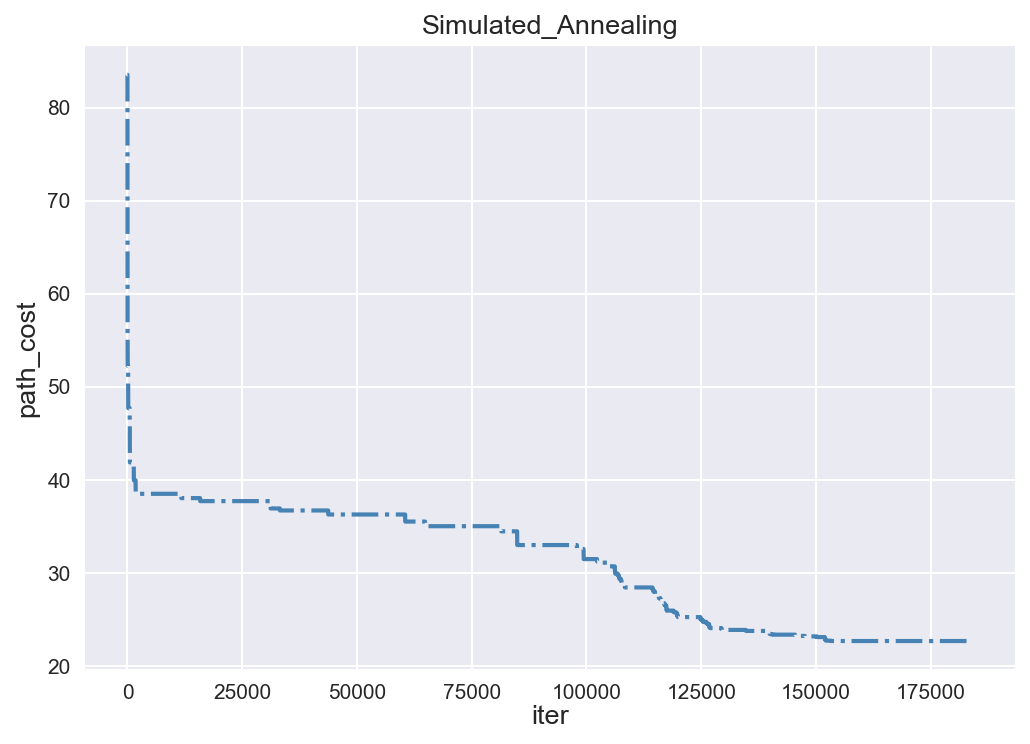

In [4]:
# 模拟退火耗时测试
total_best_cost = float("inf")
for i in range(100):
    best_path, best_cost, iterations, best_cost_list = simulated_annealing(dist, stay_time, method=2, team_num = 4)
    if best_cost  < total_best_cost:
        total_best_cost = best_cost
        total_best_path = best_path
        total_best_iterations = iterations
        total_best_list = best_cost_list

paths = split_path(total_best_path, Path, team_num = 4, expand = False)
true_paths = split_path(total_best_path, Path, team_num = 4, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_one_team_time_cost(paths[j], dist, stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n访问节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in path_expansion(true_paths[j], Path)]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", total_best_cost)
print("迭代次数:", total_best_iterations)

plt.style.use('seaborn')
plt.figure(dpi=150)
plt.plot(list(range(len(total_best_list))), total_best_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Simulated_Annealing', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

最短路径0: ['O', '2', '5', '6', '7', 'E', '11', 'G', '12', 'F', '10', 'F', '9', 'E', '8', '4', 'D', '3', '2', '3', 'C', 'O'] 
经过节点个数: 22 路径长度 196.0
最短路径1: ['O', '1', 'B', '34', '35', '33', 'A', 'R', '31', '32', '30', 'Q', '29', 'Q', '28', '27', '24', '23', 'N', '26', 'P', 'O'] 
经过节点个数: 22 路径长度 206.8
最短路径2: ['O', 'M', '25', '21', 'K', '22', '17', '16', 'I', '18', 'I', '15', '14', 'H', '14', '13', 'J', '19', 'L', '20', '25', 'N', '26', 'P', 'O'] 
经过节点个数: 25 路径长度 224.3
路径长度: 627.1
迭代次数: 1000


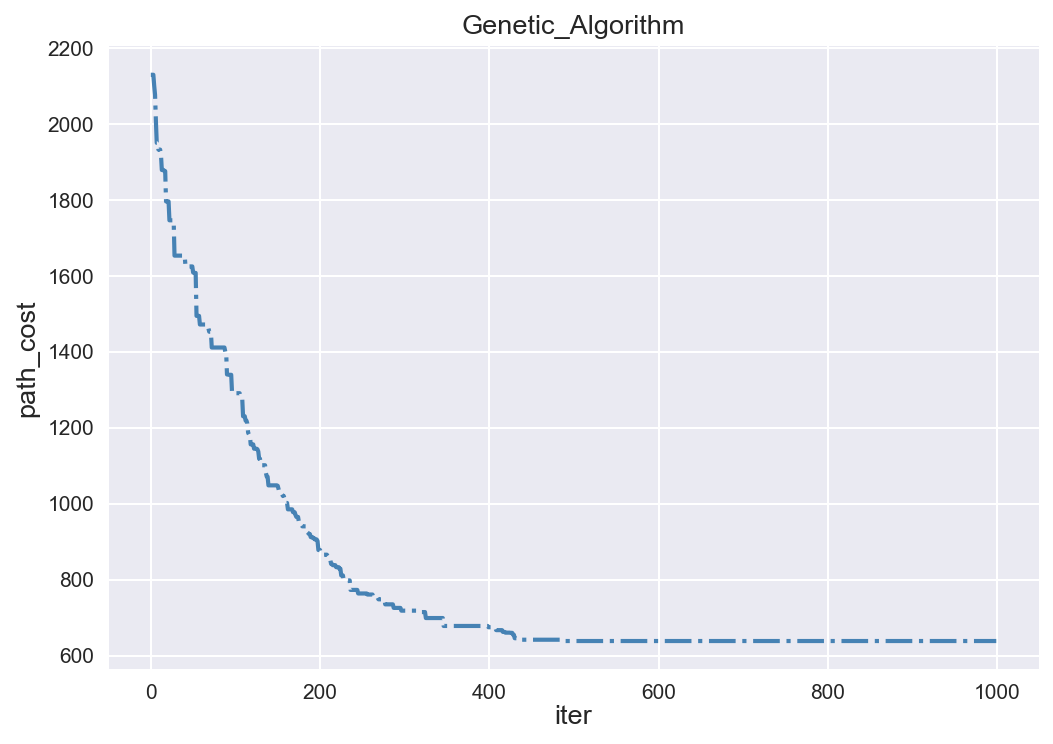

In [14]:
# 遗传算法路径长度测试
best_path, best_cost, iterations, best_cost_list = genetic_algorithm(dist, stay_time, population_size=1000, iterations=1000, team_num = 3, method = 1)
paths = split_path(best_path, Path, team_num = 3, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Genetic_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

访问节点列表0: ['O', '19', '20', 'L', '13', '11', '12', 'G', 'H', '14', '15', 'I', '18', '21', 'O'] 
访问节点个数: 15 总时间 23.8
最短路径0: ['O', '2', '5', '6', 'L', '19', '20', 'L', '19', 'J', '13', 'G', '11', 'G', '12', 'G', '12', 'H', '14', '15', 'I', '18', 'K', '21', '25', 'M', 'O'] 
经过节点个数: 27 总路程长度 236.3
-------------------------------------------------
访问节点列表1: ['O', '33', '35', '34', 'B', 'C', '3', 'E', '8', '10', 'F', '9', '7', '1', 'O'] 
访问节点个数: 15 总时间 23.8
最短路径1: ['O', '1', 'A', '33', '35', '34', 'B', 'C', '3', 'D', '7', 'E', '8', 'E', '9', 'F', '10', 'F', '9', 'E', '7', '6', '5', '2', 'O', '1', 'O'] 
经过节点个数: 27 总路程长度 237.3
-------------------------------------------------
访问节点列表2: ['O', '30', 'Q', '27', '25', '24', '23', '22', '16', '17', 'K', 'J', '6', 'M', 'O'] 
访问节点个数: 15 总时间 23.6
最短路径2: ['O', 'R', '29', 'Q', '30', 'Q', '28', '27', '26', 'N', '25', 'N', '24', '23', '22', '17', '16', '17', 'K', '18', 'J', '19', 'L', '6', 'M', 'O'] 
经过节点个数: 26 总路程长度 231.5
-----------------------------------

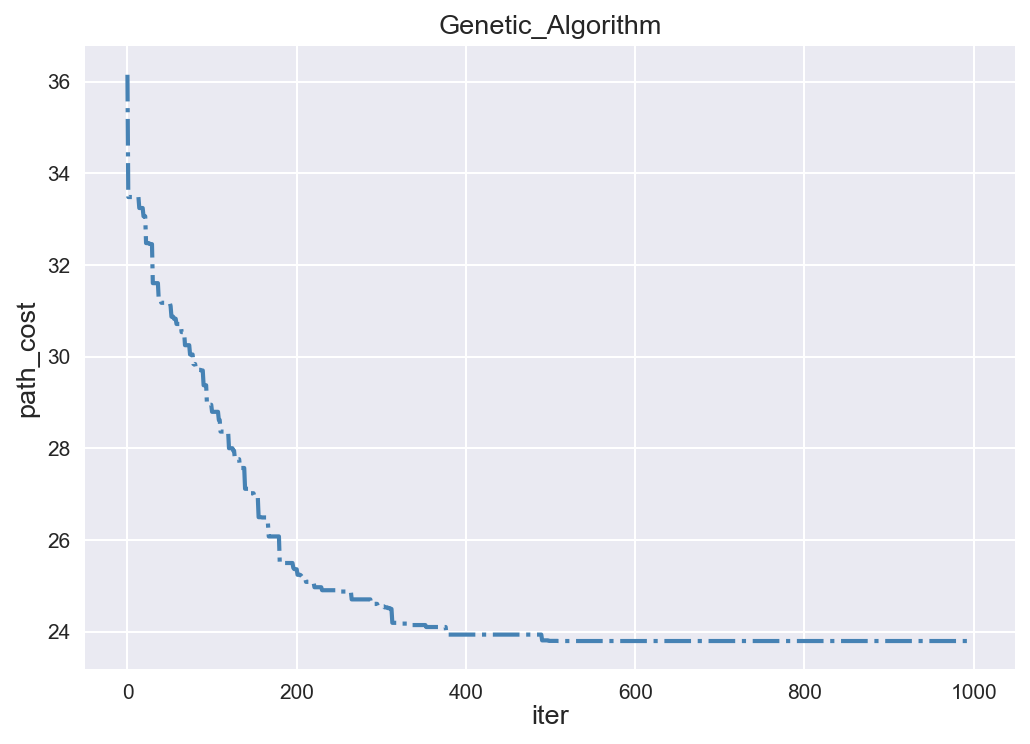

In [15]:
# 遗传算法耗时测试
best_path, best_cost, iterations, best_cost_list = genetic_algorithm(dist, stay_time, population_size=1000, iterations=1000, team_num = 4, method = 2)
paths = split_path(best_path, Path, team_num = 4, expand = False)
true_paths = split_path(best_path, Path, team_num = 4, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_one_team_time_cost(paths[j], dist, stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n访问节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in path_expansion(true_paths[j], Path)]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Genetic_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

最短路径0: ['O', 'P', '26', '27', '28', 'Q', '29', 'R', '29', 'Q', '30', '32', '31', '33', '35', '34', 'A', 'B', '1', 'O'] 
经过节点个数: 20 路径长度 172.3
最短路径1: ['O', '2', '5', '6', '7', 'E', '9', 'F', '10', 'F', '12', 'H', '14', '15', 'I', '16', '17', '22', '23', '24', 'N', '26', 'P', 'O'] 
经过节点个数: 24 路径长度 221.1
最短路径2: ['O', 'C', '3', 'D', '4', '8', 'E', '11', 'G', '13', 'J', '18', 'K', '21', '20', 'L', '19', '20', '25', 'M', 'O'] 
经过节点个数: 21 路径长度 197.8
路径长度: 591.2
迭代次数: 1000


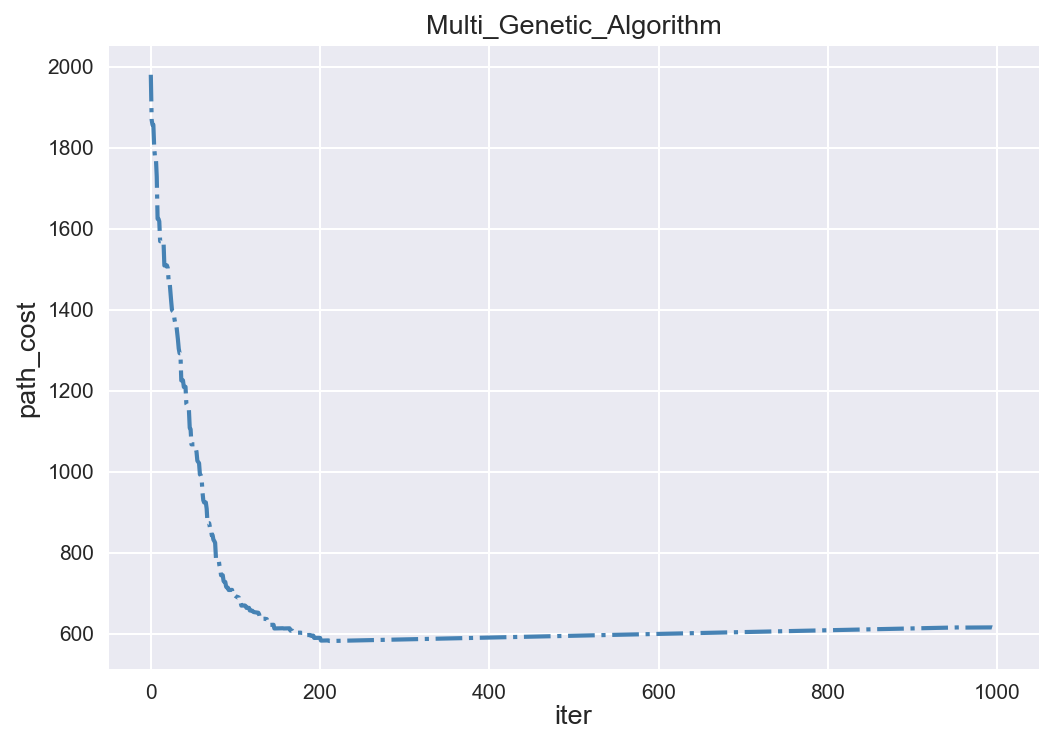

In [6]:
# 多种群遗传算法路径长度测试
best_path, best_cost, iterations, best_cost_list = multi_genetic_algorithm(dist, stay_time, population_size=1000, iterations=1000, team_num = 3, method = 1)
paths = split_path(best_path, Path, team_num = 3, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Multi_Genetic_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

访问节点列表0: ['O', 'P', '28', '27', '26', 'N', '24', '23', '22', '17', '16', '21', '20', '6', 'M', 'O'] 
访问节点个数: 16 总时间 21.8
最短路径0: ['O', 'P', '28', '27', '26', 'N', '24', '23', '22', '17', '16', '17', 'K', '21', '20', 'L', '6', 'M', 'O'] 
经过节点个数: 19 总路程长度 169.2
-------------------------------------------------
访问节点列表1: ['O', '1', 'C', 'B', '34', '35', 'A', '33', '31', '32', '30', 'Q', '29', 'R', 'O'] 
访问节点个数: 15 总时间 22.1
最短路径1: ['O', '1', 'C', 'B', '34', '35', '34', 'A', '33', '31', '32', '30', 'Q', '29', 'R', 'O'] 
经过节点个数: 16 总路程长度 142.5
-------------------------------------------------
访问节点列表2: ['O', '25', 'K', '18', 'I', '15', '14', 'H', '13', 'J', '19', 'L', '5', 'O'] 
访问节点个数: 14 总时间 22.1
最短路径2: ['O', 'M', '25', '21', 'K', '18', 'I', '15', '14', 'H', '14', '13', 'J', '19', 'L', '6', '5', '2', 'O'] 
经过节点个数: 19 总路程长度 177.0
-------------------------------------------------
访问节点列表3: ['O', '2', '7', 'E', '9', '10', 'F', '12', 'G', '11', '8', '4', 'D', '3', 'O'] 
访问节点个数: 15 总时间 22.2
最短路径3: 

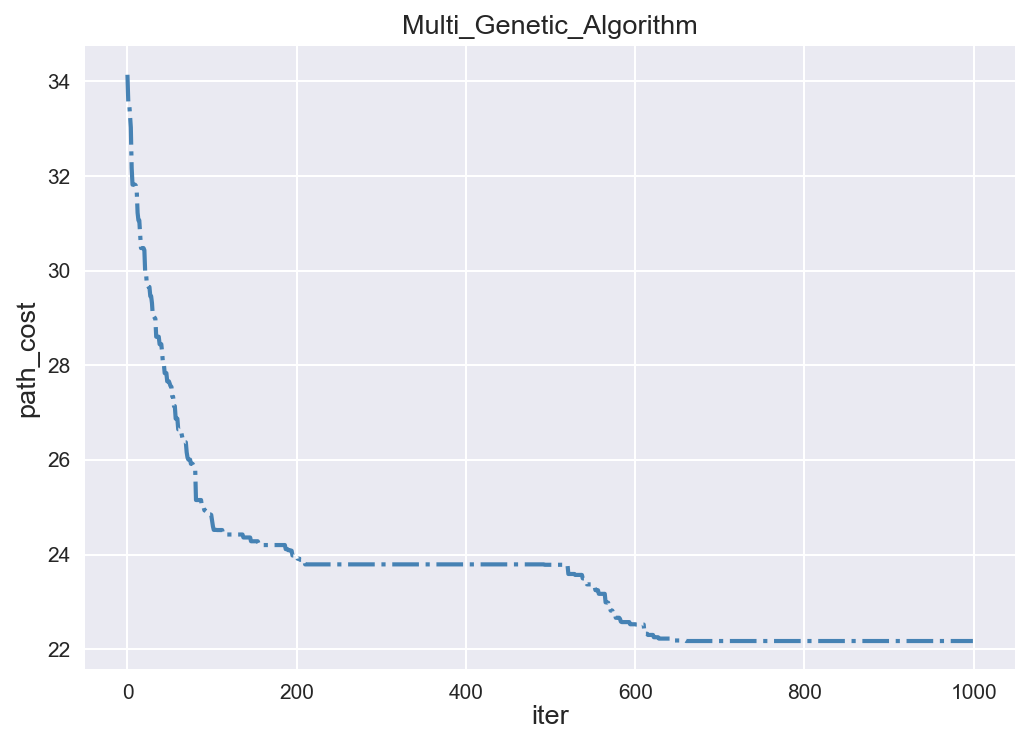

In [8]:
# 多种群遗传算法耗时测试
best_path, best_cost, iterations, best_cost_list = multi_genetic_algorithm(dist, stay_time, population_size=1000, iterations=1000, team_num = 4, method = 2)
paths = split_path(best_path, Path, team_num = 4, expand = False)
true_paths = split_path(best_path, Path, team_num = 4, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_one_team_time_cost(paths[j], dist, stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n访问节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in path_expansion(true_paths[j], Path)]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Multi_Genetic_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

最短路径0: ['O', '2', '3', 'D', '4', '8', 'E', '9', 'F', '12', 'G', '13', '14', 'H', '14', '15', 'I', '18', 'K', '21', '25', 'N', '26', '27', '28', 'Q', '29', 'R', '31', 'R', 'O'] 
经过节点个数: 31 路径长度 276.1
最短路径1: ['O', 'P', '26', 'N', '23', '22', '23', '24', '23', '21', 'K', '18', 'I', '16', '17', 'K', '18', 'J', '19', '20', '21', '23', 'N', '26', '27', '28', 'Q', '30', 'Q', '29', 'R', 'O'] 
经过节点个数: 32 路径长度 273.4
最短路径2: ['O', '1', 'B', 'A', '33', '31', '32', '35', '34', 'B', 'C', '3', '2', '3', 'D', '5', '6', 'L', '20', '25', 'M', '6', '7', 'E', '9', 'F', '10', 'F', '12', 'G', '11', 'E', '8', 'E', '7', '6', '5', '2', 'O'] 
经过节点个数: 39 路径长度 338.8
路径长度: 888.3
迭代次数: 1500


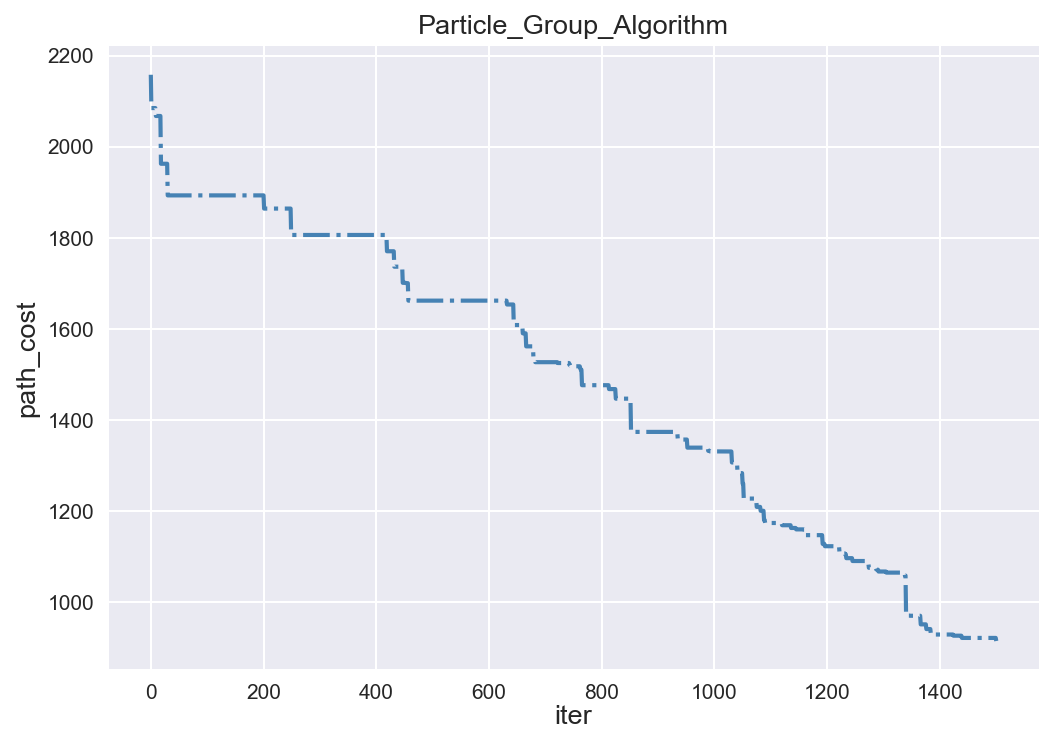

In [5]:
# 粒子群路径长度测试
best_path, best_cost, iterations, best_cost_list = particle_group_algorithm(dist, stay_time, particles_size=1000, iterations=1500, team_num = 3, method =1)
paths = split_path(best_path, Path, team_num = 3, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Particle_Group_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

访问节点列表0: ['O', '6', '3', '5', '15', 'H', 'G', 'J', '21', '24', 'N', '23', 'Q', '32', 'O'] 
访问节点个数: 15 总时间 27.6
最短路径0: ['O', '2', '5', '6', '5', '2', '3', '2', '5', 'M', '25', '21', 'K', '18', 'I', '15', '14', 'H', '12', 'G', '13', 'J', '18', 'K', '21', '23', '24', 'N', '23', 'N', '26', '27', '28', 'Q', '30', '32', '31', 'R', 'O'] 
经过节点个数: 39 总路程长度 336.7
-------------------------------------------------
访问节点列表1: ['O', '4', '16', '17', 'K', '25', '26', '29', 'C', 'B', 'A', '34', '31', 'R', 'O'] 
访问节点个数: 15 总时间 26.5
最短路径1: ['O', '2', '3', 'D', '4', 'D', '5', 'M', '25', '21', 'K', '17', '16', '17', 'K', '21', '25', 'N', '26', 'P', '29', 'R', 'O', 'C', 'B', 'A', '34', 'A', '33', '31', 'R', 'O'] 
经过节点个数: 32 总路程长度 299.2
-------------------------------------------------
访问节点列表2: ['O', '2', '13', 'I', '14', 'E', 'L', '20', '28', '27', 'D', '10', 'F', 'O'] 
访问节点个数: 14 总时间 27.9
最短路径2: ['O', '2', '5', '6', 'L', '19', 'J', '13', 'I', '15', '14', '13', 'G', '11', 'E', '7', 'L', '20', '25', 'N', '26'

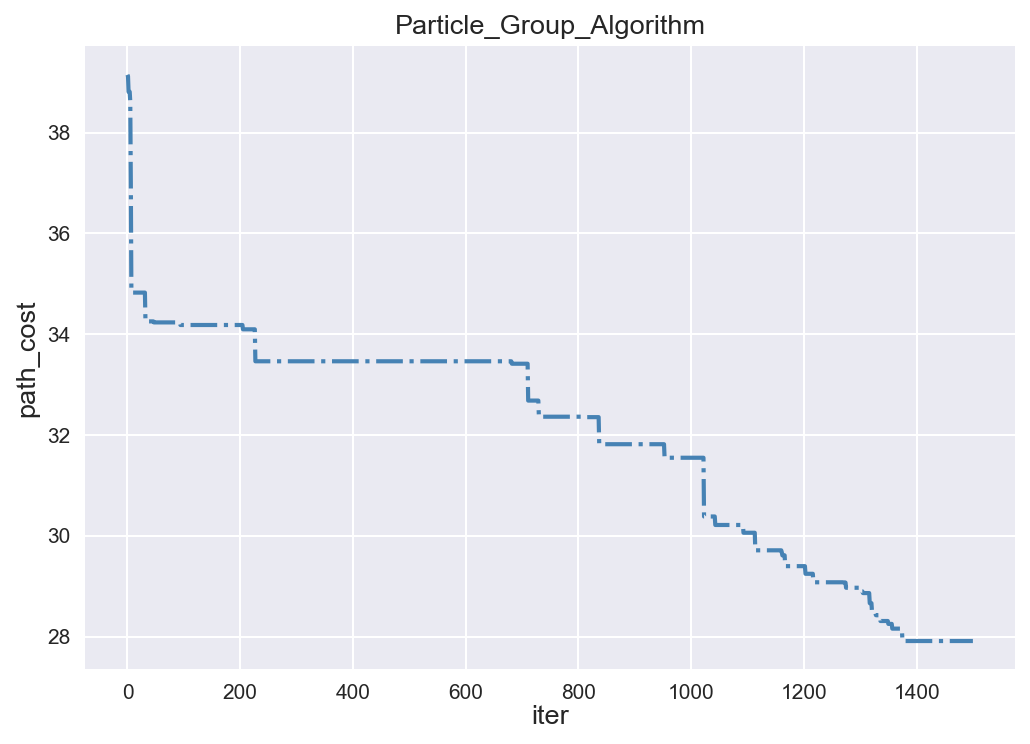

In [9]:
# 粒子群耗时测试
best_path, best_cost, iterations, best_cost_list = particle_group_algorithm(dist, stay_time, particles_size=1000, iterations=1500, team_num = 4, method =2)
paths = split_path(best_path, Path, team_num = 4, expand = False)
true_paths = split_path(best_path, Path, team_num = 4, expand = True)
for j in range(len(paths)):
    temp_length = round(calculate_one_team_time_cost(paths[j], dist, stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n访问节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(calculate_path_cost(paths[j],dist,true_cost=True),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in path_expansion(true_paths[j], Path)]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", best_cost)
print("迭代次数:", iterations)

plt.style.use('seaborn')
plt.figure(dpi=150) 
plt.plot(list(range(len(best_cost_list))), best_cost_list,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Particle_Group_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 13, labelpad = 1)
plt.ylabel("path_cost", fontsize = 13)
plt.show()

节点列表： ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'a', 'b', 'c', 'd']
分割路径： [[49, 0, 36, 37, 22, 11, 30, 47, 17, 13, 45, 9, 44, 10, 46, 12, 46, 31, 32, 39, 33, 53, 29, 38, 49], [49, 50, 18, 48, 15, 14, 8, 7, 43, 6, 54, 5, 42, 3, 41, 2, 41, 4, 40, 1, 40, 34, 49], [49, 51, 23, 19, 55, 16, 55, 19, 20, 51, 21, 52, 35, 26, 24, 25, 56, 28, 27, 49]]
最短路径0: ['O', '1', 'B', 'C', '3', '2', '5', 'M', '25', '21', 'K', '18', 'J', '19', 'L', '20', 'L', '6', '7', 'E', '8', 'a', '4', 'D', 'O'] 
经过节点个数: 25 路径长度 212
最短路径1: ['O', 'P', '26', 'N', '23', '22', '17', '16', 'I', '15', 'b', '14', 'H', '12', 'G', '11', 'G', '13', 'F', '10', 'F', '9', 'O'] 
经过节点个数: 23 路径长度 254
最短路径2: ['O', 'Q', '30', '27', 'c', '24', 'c', '27', '28', 'Q', '29', 'R', 'A', '33', '31', '3

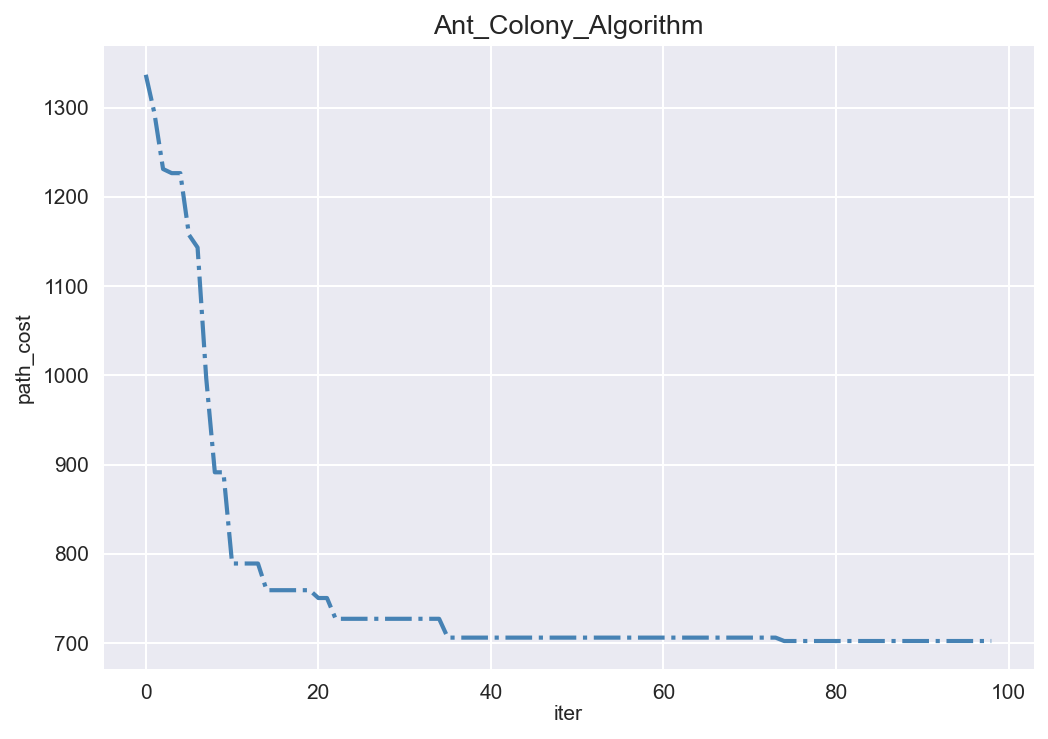

In [9]:
# 蚁群路径长度测试

import Functions_ACO 

nodes, node_index_map, adj_matrix = Functions_ACO.Read_file("map.txt")
dist, Path = floyd(adj_matrix)
stay_time = init_time_stay(nodes, node_index_map)


nodes_ACO, adj_matrix_ACO, node_index_map_ACO = Functions_ACO.Read_file_ACO('map.txt',3)
dist_ACO, Path_ACO = floyd(adj_matrix_ACO)
aco = ACO(city_num = len(nodes_ACO), team_num=3, distance = dist_ACO, stay_time=None,ant_num=200, alpha=1 , beta=2, rho=0.6, Q=1.5,iter_max=100,method=1,penalty=0.6)
aco.new()
while aco.iter < aco.iter_max:
    aco.search_path()

best_path = aco.change_path(aco.best_ant.path)
paths = Functions_ACO.split_path(best_path, Path, team_num = 3,expand=True)
for j in range(len(paths)):
    temp_length = round(Functions_ACO.calculate_path_cost(paths[j],dist,true_cost=True,penalty=1))
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"路径长度",temp_length)
print("路径长度:", aco.best_ant.total_distance)
print("迭代次数:", aco.iter)

plt.style.use('seaborn')
plt.figure(dpi=150)
plt.plot(list(range(len(aco.penalty_dists))), aco.penalty_dists,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Ant_Colony_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 10, labelpad = 1)
plt.ylabel("path_cost", fontsize = 10)
plt.show()

节点列表： ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'a', 'b', 'c', 'd']
分割路径： [[49, 50, 18, 48, 17, 12, 46, 10, 44, 9, 45, 13, 15, 16, 55, 19, 20, 49], [49, 37, 22, 38, 29, 53, 33, 39, 32, 31, 47, 30, 11, 49], [49, 14, 8, 7, 43, 6, 54, 5, 42, 3, 41, 4, 1, 40, 34, 2, 49], [49, 0, 36, 56, 28, 27, 35, 26, 24, 25, 23, 51, 21, 52, 49]]
访问节点列表0: ['O', 'P', '26', 'N', '25', '20', 'L', '19', 'J', '18', 'K', '21', '23', '24', 'c', '27', '28', 'O'] 
经过节点个数: 18 总时间 24.4
最短路径0: ['O', 'P', '26', 'N', '25', '20', 'L', '19', 'J', '18', 'K', '21', '23', '24', 'c', '27', '28', 'P', 'O'] 
经过节点个数: 19 总路程长度 156
-------------------------------------------------
访问节点列表1: ['O', 'C', '3', 'D', '4', 'a', '8', 'E', '7', '6', 'M', '5', '2', 'O'] 
经过节点个数: 14 总时间 18.5
最短路径

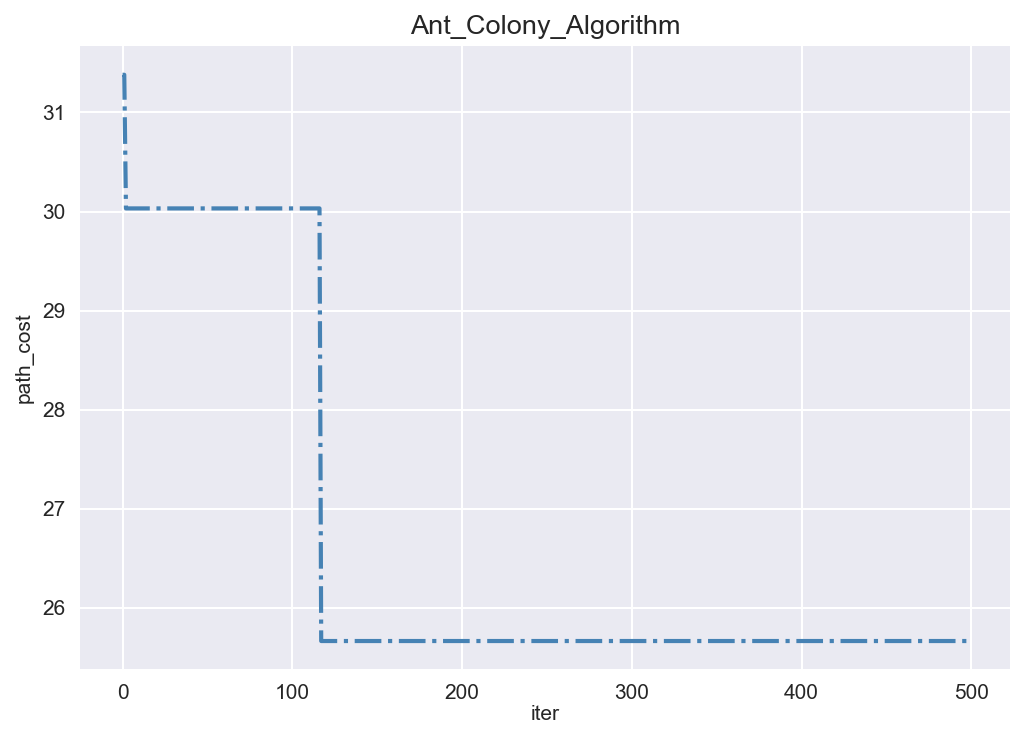

In [8]:
# 蚁群耗时测试

import Functions_ACO 

nodes, node_index_map, adj_matrix = Functions_ACO.Read_file("map.txt")
dist, Path = floyd(adj_matrix)
stay_time = init_time_stay(nodes, node_index_map)

nodes_ACO, adj_matrix_ACO, node_index_map_ACO = Functions_ACO.Read_file_ACO('map.txt',4)
dist_ACO, Path_ACO = floyd(adj_matrix_ACO)
stay_time = init_time_stay(nodes, node_index_map)
aco = ACO(city_num = len(nodes_ACO), team_num=4, distance = dist_ACO, stay_time=stay_time,ant_num=100, alpha=1, beta=2, rho=0.6,Q = 3,iter_max=500,method=2)
aco.new()
while aco.iter < aco.iter_max:
    aco.search_path()

best_path = aco.change_path(aco.best_ant.path)
paths = Functions_ACO.split_path(best_path, Path, team_num = 4, expand = False)
true_paths = Functions_ACO.split_path(best_path, Path, team_num = 4, expand = True)
print("分割路径：", paths)
for j in range(len(paths)):
    temp_length = round(Functions_ACO.calculate_one_team_time_cost(paths[j],dist,stay_time=stay_time),1)
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in paths[j]]
    print("访问节点列表"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总时间",temp_length)
    temp_length = round(Functions_ACO.calculate_path_cost(paths[j],dist,true_cost=True,penalty=1))
    temp_path = [list(node_index_map.keys())[list(node_index_map.values()).index(i)] for i in true_paths[j]]
    print("最短路径"+str(j)+":", temp_path, "\n经过节点个数:", len(temp_path),"总路程长度",temp_length)
    print("-------------------------------------------------")
print("总时间:", aco.best_ant.total_time)
print("迭代次数:", aco.iter)

plt.style.use('seaborn')
plt.figure(dpi=150)
plt.plot(list(range(len(aco.times))), aco.times,linestyle='-.', linewidth=2, color='steelblue')
plt.title('Ant_Colony_Algorithm', fontsize = 13)
plt.xlabel("iter", fontsize = 10, labelpad = 1)
plt.ylabel("path_cost", fontsize = 10)
plt.show()

In [6]:
import Functions_ACO 

nodes, node_index_map, adj_matrix = Functions_ACO.Read_file("map.txt")
dist, Path = floyd(adj_matrix)
stay_time = init_time_stay(nodes, node_index_map)
#贪心
Greedy_solver = Greedy(dists=dist,stay_time = stay_time,
                       node_index_map = node_index_map,team_nums = 4,
                       velocity=35,consider_stay= True)
ans = Greedy_solver.get_answer() 



节点列表： ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'a', 'b', 'c', 'd']
最短路径0: ['O', '1', '33', '31', '29', '28', '32', '35', 'B', 'P', '4', '8', 'E', 'F', 'O'] 
经过节点个数: 15 总时间 25.4
最短路径1: ['O', '2', '6', '25', '21', '23', '24', '17', 'K', 'M', 'D', '9', '10', 'G', 'O'] 
经过节点个数: 15 总时间 25.5
最短路径2: ['O', '3', 'C', '26', '27', '30', '34', 'A', 'R', 'Q', 'N', 'L', 'J', 'I', 'O'] 
经过节点个数: 15 总时间 29.6
最短路径3: ['O', '5', '7', '20', '19', '18', '22', '16', '15', '13', '11', '12', '14', 'H', 'O'] 
经过节点个数: 15 总时间 22.4
总时间: 29.6


In [7]:
# 问题三
solver = Solver(dists=dist,stay_time = stay_time,node_index_map = node_index_map)
ans = solver.get_answer()

最短路径0: ['O', 'H', 'O'] 
经过节点个数: 3 总时间 6.4
最短路径1: ['O', '14', '13', 'O'] 
经过节点个数: 4 总时间 6.2
最短路径2: ['O', '15', '16', 'O'] 
经过节点个数: 4 总时间 6.3
最短路径3: ['O', '12', '11', 'O'] 
经过节点个数: 4 总时间 5.9
最短路径4: ['O', '10', '8', 'O'] 
经过节点个数: 4 总时间 6.2
最短路径5: ['O', 'G', 'O'] 
经过节点个数: 3 总时间 5.6
最短路径6: ['O', 'I', 'O'] 
经过节点个数: 3 总时间 5.5
最短路径7: ['O', 'F', '9', 'O'] 
经过节点个数: 4 总时间 6.1
最短路径8: ['O', 'J', '18', 'O'] 
经过节点个数: 4 总时间 6.3
最短路径9: ['O', '17', '22', '23', 'O'] 
经过节点个数: 5 总时间 6.1
最短路径10: ['O', '19', 'L', 'O'] 
经过节点个数: 4 总时间 5.6
最短路径11: ['O', '24', '21', '20', 'O'] 
经过节点个数: 5 总时间 6.1
最短路径12: ['O', 'K', '25', 'O'] 
经过节点个数: 4 总时间 5.5
最短路径13: ['O', 'E', '7', '6', 'O'] 
经过节点个数: 5 总时间 6.4
最短路径14: ['O', '35', '34', '32', 'O'] 
经过节点个数: 5 总时间 5.8
最短路径15: ['O', '30', 'Q', '28', 'O'] 
经过节点个数: 5 总时间 6.1
最短路径16: ['O', '4', 'D', '5', 'O'] 
经过节点个数: 5 总时间 6.2
最短路径17: ['O', 'N', '26', '27', 'O'] 
经过节点个数: 5 总时间 6.2
最短路径18: ['O', 'M', '3', '2', 'O'] 
经过节点个数: 5 总时间 5.7
最短路径19: ['O', 'A', '33', '31', 'O'] 
经过节点个数: 5 总时间